This kernel is going to solve [Predict Future Sales Competition](https://www.kaggle.com/c/competitive-data-science-predict-future-sales) on Kaggle.

**Competition Description:**


This challenge serves as final project for the ["How to win a data science competition"](https://www.coursera.org/learn/competitive-data-science/home/welcome) Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - [1C Company](http://1c.ru/eng/title.htm). 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

# Import Libraries
First, we import necessary libraries, such as:

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import The Data

In [274]:
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')

train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
test = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

sample_submission = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv')

# Read The Data

In [275]:
print('item_categories')
display(item_categories.head())

print('items')
display(items.head())

print('shops')
display(shops.head())

print('train')
display(train.head())

print('test')
display(test.head())

print('sample_submission')
display(sample_submission.head())

item_categories


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


items


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


shops


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


test


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


sample_submission


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


- Check train info

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


- Check for missing values

In [277]:
print('train')
display(train.isnull().sum())

print('test')
display(test.isnull().sum())

train


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

test


ID         0
shop_id    0
item_id    0
dtype: int64

- Quick look using ```describe()``` function

In [278]:
print('train')
display(train.describe(include='all'))

print('test')
display(test.describe(include='all'))

train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN
top,28.12.2013,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,NaN,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,NaN,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00


test


,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


**Quick observations:**
- There are no missing values.
- The train and test datasets did not match in term of features.
- There is minus value(s) in item_price.
- There is minus value(s) in item_cnt_day.

# Exploratory Data Analysis

### Removing Duplicates

In [280]:
#drop duplicates
subset = ['date','date_block_num','shop_id','item_id','item_cnt_day']
print(train.duplicated(subset=subset).value_counts())
train.drop_duplicates(subset=subset, inplace=True)

False    2935825
True          24
dtype: int64


### Check negative values in item_price

In [281]:
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


Since there is only 1 negative value in item_price, we can just drop that because it won't affect the prediction too much.

In [282]:
#drop negative value in item_price
train = train[train['item_price'] > 0]

In [283]:
train = train[train['item_cnt_day'] > 0]

### Cleaning item_price and item_cnt_day
- Check min and max

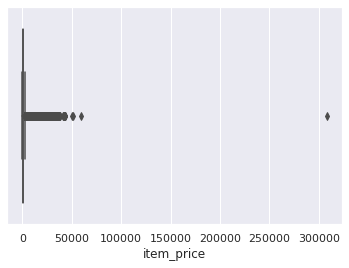

In [284]:
sns.boxplot(train['item_price']);

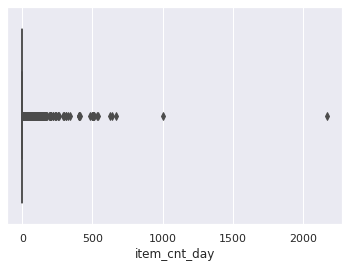

In [285]:
sns.boxplot(train['item_cnt_day']);

- Drop outliers

In [286]:
#define a drop outliers function
def drop_outliers(df, feature, percentile_high = .99):
    '''df (dataframe)           : dataset
       feature (string)         : column
       percentile_high (float)  : upper limit
       .........................................................
    '''
    #train size before dropping values
    shape_init = df.shape[0]
    
    #get percentile value
    max_value = df[feature].quantile(percentile_high)
    
    #drop outliers
    print('dropping outliers...')
    df = df[df[feature] < max_value]
    
    print(str(shape_init - df.shape[0]) + ' ' + feature + ' values over ' + str(max_value) + ' have been removed' )
    
    return df

In [287]:
#drop outliers in item_price feature
train = drop_outliers(train, 'item_price')

dropping outliers...
29347 item_price values over 5999.0 have been removed


In [288]:
#drop outliers in item_cnt_day
train = drop_outliers(train, 'item_cnt_day')

dropping outliers...
37347 item_cnt_day values over 5.0 have been removed


### Price
Make a dataframe with item_price feature group by shop_id and item_id to get price for each item per shop. We can use this dataframe to create item_price feature for test dataset.

In [289]:
prices_shop_df = train[['shop_id','item_id','item_price']]
prices_shop_df = prices_shop_df.groupby(['shop_id','item_id']).apply(lambda df: df['item_price'][-2:].mean())
prices_shop_df = prices_shop_df.to_frame(name = 'item_price')

prices_shop_df

item_price
shop_id item_id            
0       30            265.0
        31            434.0
        32            221.0
        33            347.0
        35            247.0
...                     ...
59      22154         999.0
        22155         149.0
        22162         349.0
        22164         699.0
        22167         299.0

[418764 rows x 1 columns]

Now we can merge this dataframe with test dataset to create item_price feature in test dataset.

In [290]:
test = pd.merge(test, prices_shop_df, how='left', left_on=['shop_id','item_id'], right_on=['shop_id','item_id'])

test.head()

,ID,shop_id,item_id,item_price
0,0,5,5037,749.25
1,1,5,5320,NaN
2,2,5,5233,1199.00
3,3,5,5232,599.00
4,4,5,5268,NaN


In [291]:
#check for missing values
test['item_price'].isnull().sum()

104035

There are still missing values in test's item_price. We will fill this later by creating more features from item_categories.

### Transform Data in Train Dataset As Monthly

In [292]:
#split content in date into month and year
train['month'] = [date.split('.')[1] for date in train['date']]
train['year'] = [date.split('.')[2] for date in train['date']]

#drop date and date_block_num features
train.drop(['date','date_block_num'], axis=1, inplace=True)

#create month and year features fot test dataset
test['month'] = '11'
test['year'] = '2015'

In [293]:
#change item_cnt_day into item_cnt_month
train_monthly = train.groupby(['year','month','shop_id','item_id'], as_index=False)[['item_cnt_day']].sum()
train_monthly.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

train_monthly = pd.merge(train_monthly, prices_shop_df, how='left', left_on=['shop_id','item_id'], right_on=['shop_id','item_id'])

train_monthly.head()

,year,month,shop_id,item_id,item_cnt_month,item_price
0,2013,01,0,32,6.0,221.0
1,2013,01,0,33,3.0,347.0
2,2013,01,0,35,1.0,247.0
3,2013,01,0,43,1.0,221.0
4,2013,01,0,51,2.0,127.0


In [294]:
train = train_monthly

### Reindex test dataset

In [295]:
test = test.reindex(columns=['ID','year','month','shop_id','item_id','item_price'])

test.head()

,ID,year,month,shop_id,item_id,item_price
0,0,2015,11,5,5037,749.25
1,1,2015,11,5,5320,NaN
2,2,2015,11,5,5233,1199.00
3,3,2015,11,5,5232,599.00
4,4,2015,11,5,5268,NaN


### Exploring other datasets
- Exploring Item Categories dataset

In [297]:
#extract main categories
item_categories['main_category'] = [x.split(' - ')[0] for x in item_categories['item_category_name']]

#some items don't have sub-categories. For those, we will use None as a sub-category (consider the main category as a sub)
sub_categories = []
for i in range(len(item_categories)):
    try:
        sub_categories.append(item_categories['item_category_name'][i].split(' - ')[1])
        
    except IndexError as e:
        sub_categories.append('None')
        #sub_categories.append(item_categories['main_category'][i])

item_categories['sub_category'] = sub_categories

#drop item_category_name
item_categories.drop(['item_category_name'], axis=1, inplace=True)

item_categories.head()

,item_category_id,main_category,sub_category
0,0,PC,Гарнитуры/Наушники
1,1,Аксессуары,PS2
2,2,Аксессуары,PS3
3,3,Аксессуары,PS4
4,4,Аксессуары,PSP


- Exploring Items Dataset

In [298]:
#merge with item_categories
items = pd.merge(items, item_categories, how='left')

#drop item_name and item_category_id
items.drop(['item_name','item_category_id'], axis=1, inplace=True)

items.head()

,item_id,main_category,sub_category
0,0,Кино,DVD
1,1,Программы,Для дома и офиса (Цифра)
2,2,Кино,DVD
3,3,Кино,DVD
4,4,Кино,DVD


In [299]:
#merge to train and test datasets
train = pd.merge(train, items, how='left')
test = pd.merge(test, items, how='left')

- Exploring Shops Dataset

In [300]:
from string import punctuation

# replace all the punctuation in the shop_name columns
shops["shop_name_cleaned"] = shops["shop_name"].apply(lambda s: "".join([x for x in s if x not in punctuation]))

# extract the city name
shops["shop_city"] = shops["shop_name_cleaned"].apply(lambda s: s.split()[0])

#extract the type
shops["shop_type"] = shops["shop_name_cleaned"].apply(lambda s: s.split()[1])

#extract shop's name
shops["shop_name"] = shops["shop_name_cleaned"].apply(lambda s: " ".join(s.split()[2:]))

shops.drop(['shop_name_cleaned'], axis=1, inplace=True)

shops.head()

,shop_name,shop_id,shop_city,shop_type
0,56 фран,0,Якутск,Орджоникидзе
1,Центральный фран,1,Якутск,ТЦ
2,Мега,2,Адыгея,ТЦ
3,ОктябрьКиномир,3,Балашиха,ТРК
4,Волга Молл,4,Волжский,ТЦ


In [301]:
#merge to train and test datasets
train = pd.merge(train, shops, how='left')
test = pd.merge(test, shops, how='left')

Display current train and test datasets

In [302]:
print('train')
display(train.head())

print('test')
display(test.head())

train


,year,month,shop_id,item_id,item_cnt_month,item_price,main_category,sub_category,shop_name,shop_city,shop_type
0,2013,01,0,32,6.0,221.0,Кино,DVD,56 фран,Якутск,Орджоникидзе
1,2013,01,0,33,3.0,347.0,Кино,Blu-Ray,56 фран,Якутск,Орджоникидзе
2,2013,01,0,35,1.0,247.0,Кино,DVD,56 фран,Якутск,Орджоникидзе
3,2013,01,0,43,1.0,221.0,Кино,DVD,56 фран,Якутск,Орджоникидзе
4,2013,01,0,51,2.0,127.0,Музыка,MP3,56 фран,Якутск,Орджоникидзе


test


,ID,year,month,shop_id,item_id,item_price,main_category,sub_category,shop_name,shop_city,shop_type
0,0,2015,11,5,5037,749.25,Игры,PS3,Мармелад,Вологда,ТРЦ
1,1,2015,11,5,5320,NaN,Музыка,CD локального производства,Мармелад,Вологда,ТРЦ
2,2,2015,11,5,5233,1199.00,Игры,PS3,Мармелад,Вологда,ТРЦ
3,3,2015,11,5,5232,599.00,Игры,XBOX 360,Мармелад,Вологда,ТРЦ
4,4,2015,11,5,5268,NaN,Игры,PS4,Мармелад,Вологда,ТРЦ


### Fill missing values in item_price (by item categories)

In [303]:
#fill missing values with median of each main_category and sub_category
test['item_price'] = test.groupby(['main_category','sub_category'])['item_price'].apply(lambda df: df.fillna(df.median()))

In [304]:
test['item_price'].isnull().sum()

840

In [305]:
#fill missing values with median of each sub_category
test['item_price'] = test.groupby(['sub_category'])['item_price'].apply(lambda df: df.fillna(df.median()))

In [306]:
test['item_price'].isnull().sum()

42

Show remaining missing values

In [307]:
test[test['item_price'].isnull()]

,ID,year,month,shop_id,item_id,item_price,main_category,sub_category,shop_name,shop_city,shop_type
3514,3514,2015,11,5,5441,NaN,PC,Гарнитуры/Наушники,Мармелад,Вологда,ТРЦ
8614,8614,2015,11,4,5441,NaN,PC,Гарнитуры/Наушники,Волга Молл,Волжский,ТЦ
13714,13714,2015,11,6,5441,NaN,PC,Гарнитуры/Наушники,13,Воронеж,Плехановская
18814,18814,2015,11,3,5441,NaN,PC,Гарнитуры/Наушники,ОктябрьКиномир,Балашиха,ТРК
23914,23914,2015,11,2,5441,NaN,PC,Гарнитуры/Наушники,Мега,Адыгея,ТЦ
29014,29014,2015,11,7,5441,NaN,PC,Гарнитуры/Наушники,Максимир,Воронеж,ТРЦ
34114,34114,2015,11,10,5441,NaN,PC,Гарнитуры/Наушники,Чкалова 39м,Жуковский,ул
39214,39214,2015,11,12,5441,NaN,PC,Гарнитуры/Наушники,,Интернетмагазин,ЧС
44314,44314,2015,11,28,5441,NaN,PC,Гарнитуры/Наушники,МЕГА Теплый Стан II,Москва,ТЦ
49414,49414,2015,11,31,5441,NaN,PC,Гарнитуры/Наушники,Семеновский,Москва,ТЦ


All remaining item_price's missing values have same main_category and sub_category. This main and sub categories are not in the test dataset, but in train dataset.

In [308]:
#fill missing values with median of main_category and sub_category from train dataset
filler = train[(train['main_category'] == 'PC') & (train['sub_category'] == 'Гарнитуры/Наушники')]['item_price'].median()

test['item_price'].fillna(filler, inplace=True)

In [309]:
test['item_price'].isnull().sum()

0

### Exploratory Data Analysis: Epilogue
- From competition's evaluation note, target values are clipped into [0,20] range.

In [311]:
train['item_cnt_month'] = train['item_cnt_month'].clip(0,20)

- Define target_array

In [312]:
target_array = train['item_cnt_month']
train.drop(['item_cnt_month'], axis=1, inplace=True)

test_id = test['ID']
test.drop(['ID'], axis=1, inplace=True)

- Drop shop_id & item_id

In [313]:
train.drop(['shop_id','item_id'], axis=1, inplace=True)
test.drop(['shop_id','item_id'], axis=1, inplace=True)

- Reduce memory usage

In [315]:
def downcast_dtypes(df):
    '''df (dataframe)  : data
       Changes column types in the dataframe
           `float64` type to `float32`
           `int64`   type to `int32`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    return df

In [316]:
#reduce memory
downcast_dtypes(train)
downcast_dtypes(test)

,year,month,item_price,main_category,sub_category,shop_name,shop_city,shop_type
0,2015,11,749.25,Игры,PS3,Мармелад,Вологда,ТРЦ
1,2015,11,299.00,Музыка,CD локального производства,Мармелад,Вологда,ТРЦ
2,2015,11,1199.00,Игры,PS3,Мармелад,Вологда,ТРЦ
3,2015,11,599.00,Игры,XBOX 360,Мармелад,Вологда,ТРЦ
4,2015,11,2299.00,Игры,PS4,Мармелад,Вологда,ТРЦ
...,...,...,...,...,...,...,...,...
214195,2015,11,149.00,Музыка,CD локального производства,ПаркХаус,Самара,ТЦ
214196,2015,11,999.00,Подарки,Настольные игры,ПаркХаус,Самара,ТЦ
214197,2015,11,199.00,Музыка,CD локального производства,ПаркХаус,Самара,ТЦ
214198,2015,11,169.00,Кино,DVD,ПаркХаус,Самара,ТЦ


In [317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592067 entries, 0 to 1592066
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   year           1592067 non-null  object 
 1   month          1592067 non-null  object 
 2   item_price     1592067 non-null  float32
 3   main_category  1592067 non-null  object 
 4   sub_category   1592067 non-null  object 
 5   shop_name      1592067 non-null  object 
 6   shop_city      1592067 non-null  object 
 7   shop_type      1592067 non-null  object 
dtypes: float32(1), object(7)
memory usage: 103.2+ MB


- Check for missing values

In [319]:
#check for any missing data
print('missing data in the train dataset : ', train.isnull().any().sum())
print('missing data in the test dataset : ', test.isnull().any().sum())

missing data in the train dataset :  0
missing data in the test dataset :  0


- Normality test

In [320]:
#define a normality test function
def normalityTest(data, alpha=0.05):
    """data (array)   : The array containing the sample to be tested.
	   alpha (float)  : Significance level.
	   return True if data is normal distributed"""
    
    from scipy import stats
    
    statistic, p_value = stats.normaltest(data)
    
    #null hypothesis: array comes from a normal distribution
    if p_value < alpha:  
        #The null hypothesis can be rejected
        is_normal_dist = False
    else:
        #The null hypothesis cannot be rejected
        is_normal_dist = True
    
    return is_normal_dist

In [321]:
#check normality of all numericaal features and transform it if not normal distributed
for feature in train.columns:
    if (train[feature].dtype != 'object'):
        if normalityTest(train[feature]) == False:
            train[feature] = np.log1p(train[feature])
            test[feature] = np.log1p(test[feature])

In [322]:
#use numpy.log1p in order to target_array follows a normal distribution
target_array = np.log1p(target_array)

- Encoding

In [323]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X = enc.fit_transform(train)
y = target_array

X_predict = enc.fit_transform(test)

# Creating a model

We begin by splitting data into two subsets: for training data and for testing data.

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 0)

We will use XGBRegressor model to predict total sales for every product and store in the next month.

In [325]:
from xgboost import XGBRegressor

#create a model
model = XGBRegressor()

#fitting
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:0.53285	validation_1-rmse:0.53070
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.47582	validation_1-rmse:0.47366
[2]	validation_0-rmse:0.44368	validation_1-rmse:0.44160
[3]	validation_0-rmse:0.42537	validation_1-rmse:0.42344
[4]	validation_0-rmse:0.41539	validation_1-rmse:0.41357
[5]	validation_0-rmse:0.41000	validation_1-rmse:0.40845
[6]	validation_0-rmse:0.40615	validation_1-rmse:0.40471
[7]	validation_0-rmse:0.40421	validation_1-rmse:0.40290
[8]	validation_0-rmse:0.40289	validation_1-rmse:0.40167
[9]	validation_0-rmse:0.40201	validation_1-rmse:0.40083
[10]	validation_0-rmse:0.40087	validation_1-rmse:0.39975
[11]	validation_0-rmse:0.40006	validation_1-rmse:0.39892
[12]	validation_0-rmse:0.39914	validation_1-rmse:0.39806
[13]	validation_0-rmse:0.39864	validation_1-rmse:0.39762
[14]	validation_0-rmse:0.39760	validation_1-rmse:0.39

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [326]:
#calculate Mean Squared Error
from sklearn.metrics import mean_squared_error

print('MSE : ', mean_squared_error(y_test, model.predict(X_test)))

MSE :  0.14499894862846432


In [327]:
#make a prediction
y_predict = model.predict(X_predict)

#transform the values back
y_predict = np.expm1(y_predict)

In [328]:
#sava results to a file
results = pd.DataFrame({'ID': test_id, 'item_cnt_month': y_predict})
results.to_csv('my_submission.csv', index=False)